# Topic Modelling
This notebook aims to visualize the topics of the corpus using LDA, BertTopic and WordClouds.

## Data
The most similar documents have been queried in another file and saved in a csv file. 
This file is loaded here and further used.

In [1]:
import json
 
# Opening JSON file
with open('results/results.json', 'r') as openfile:
 
    # Reading from json file
    results = json.load(openfile)
 
print(results)
print(type(results))

{'cluster': {'/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC53-21.pdf': ['/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC53-21.pdf', '/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC84-33.pdf', '/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC49-41.pdf', '/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC59-23.pdf', '/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC23-16.pdf']}, 'tfidf': {'/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC53-21.pdf': ['/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC53-21.pdf', '/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC53-26.pdf', '/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC72-5.pdf', '/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC54-23.pdf', '/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC18-9.pdf', '/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC72-13.pdf', '/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC53-28.pdf', '/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC49-2.pdf', '

## WordClouds
This approach seems to be usable if a group of similar documents already exists.

[nltk_data] Downloading package stopwords to /Users/klara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/klara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/klara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/klara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/klara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


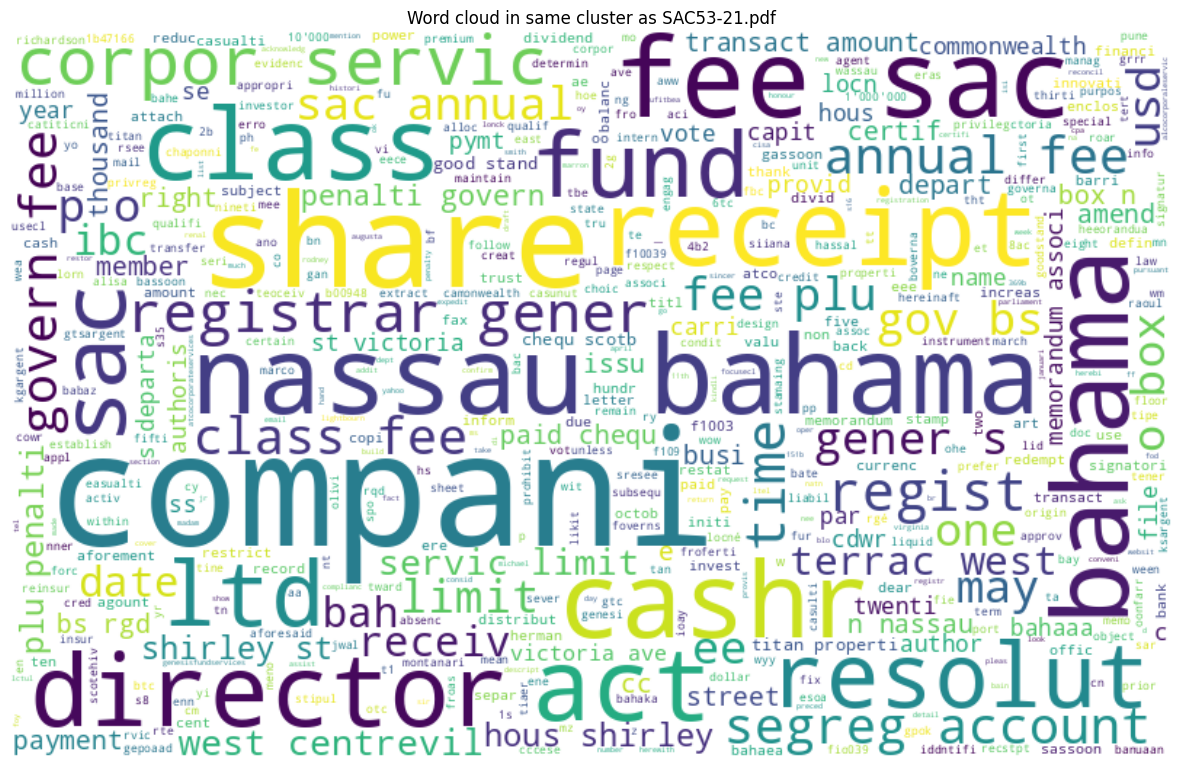

In [2]:
from text_visualizations.visualize_texts import *
from text_embeddings.preprocessing.read_pdf import *

file_paths = list(results['cluster'].values())[0]
stemmed_filtered_tokens = []
for path in file_paths:
    text = pdf_to_str(path)

    tokens = tokenize(text)
    filtered_tokens = remove_stop_words(tokens)
    stemmed_filtered_tokens.extend(stemming(filtered_tokens))

# visualize the texts
word_cloud(stemmed_filtered_tokens, file_name='same cluster as ' + list(results['cluster'].keys())[0].split('/')[-1], outpath=None)

# BertTopic
This approach may be more intuive on different document types, since it identifies topics and seems to seperate documents into different topics groups.

See for different visualization techniques: https://maartengr.github.io/BERTopic/getting_started/visualization/visualization.html

One can choose one of the following clustering algorithms: HBDSCAN, k-Means, Agglomerative Clustering and cuML HDBSCAN.
The default clustering algorithm is HDBSCAN.
(cf. https://maartengr.github.io/BERTopic/getting_started/clustering/clustering.html)

In [3]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from elasticSearch.queries.query_documents_tfidf import get_docs_from_file_paths

docs = get_docs_from_file_paths(file_paths)
print(docs)

topic_model = BERTopic()

/Users/klara/Developer/Uni/topic-analysis-text-data/.bsc-py/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/klara/Developer/Uni/topic-analysis-text-data/.bsc-py/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/klara/Develop

['  \n- THE COMMONWEALTH OF THE BAHAMAS \nThe International Business Companies Act 2000; The Segregated Accounts Act, 2004 \nCompany Limited by Shares \n     RESTATED _ \nmo MEMORANDUM OF ASSOCIATION if \nOF CO \nINNOVATIS INVESTMENTS FUND LIMITED (SAC) \n1. The name of the Company is INNOVATIS INVESTMENTS FUND LIMITED \n(SAC). \n| 2. The registered office of the Company will be at 2"™ Terrace West, Centreville, P.O. \n| Box N-7755, Nassau, Bahamas. \n3. The registered agent of the Company will be First Choice Services Ltd., an Terrace \nWest, Centreville House, P.O. Box N-10567, Nassau, Bahamas. \n4. The object or purpose for which the Company is established is to engage in any act or \nCommonwealth of the Bahamas. \n5. In the absence of appropriate authorisation the Company may not: \n1 \nCompanies Regulation Act 2000; \n(b) carry on business as an insurance or a reinsurance company; or \n| \n(c) carry on the business of providing corporate or financial services as \ndefined’ by the 

In [4]:
# duplicate list to solve error, cf: https://github.com/MaartenGr/BERTopic/issues/97
topics, probs = topic_model.fit_transform(docs * 100)

In [5]:
# -1 refers to all outliers and should typically be ignored, cf. https://maartengr.github.io/BERTopic/index.html#quick-start(
display(topic_model.get_topic_info())
topic_model.get_topic(1)

,Topic,Count,Name,Representation,Representative_Docs
0,0,100,0_the_of_or_shares,"[the, of, or, shares, to, company, as, in, and...",[ \n- THE COMMONWEALTH OF THE BAHAMAS \nThe I...
1,1,100,1_cashr_bahamas_ee_transaction,"[cashr, bahamas, ee, transaction, receipt, reg...",[ \nDates 2-12-2018 Bovernaent of The Baham...
2,2,100,2_500_sac_150_fees,"[500, sac, 150, fees, 1000, annual, classes, 2...",[ \n a GENESIS FUND SERVICES LIMITED \n308 E...
3,3,100,3_government_penalty_52500_plus,"[government, penalty, 52500, plus, fee, 2008, ...",[ \n \n ATCO | corporate SERVICES LTD. ...
4,4,100,4_fund_the_act_herman,"[fund, the, act, herman, title, barry, of, tha...",[ \nC) \nCOMMONWEALTH OF THE BAHAMAS \nNew Pr...


[('cashr', 0.08122494517900769),
 ('bahamas', 0.053586259464842724),
 ('ee', 0.05198016764091193),
 ('transaction', 0.05198016764091193),
 ('receipt', 0.05168860147755035),
 ('registrar', 0.048322889609960874),
 ('generals', 0.048322889609960874),
 ('2500', 0.048322889609960874),
 ('st', 0.04525697784094084),
 ('received', 0.04525697784094084)]

In [6]:
topic_model.visualize_topics()

In [12]:
# relation between topics
'''topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(docs*100)
hierarchical_topics = topic_model.hierarchical_topics(docs) 
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)'''

'topic_model = BERTopic(verbose=True)\ntopics, probs = topic_model.fit_transform(docs*100)\nhierarchical_topics = topic_model.hierarchical_topics(docs) \ntopic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)'

In [13]:
# c-TF-IDF scores for each topic representation
topic_model.visualize_barchart()

In [14]:
# cosine similarities between topic embeddings
topic_model.visualize_heatmap()

In [17]:
# for usage of HDBSCAN model
topic_model = BERTopic(calculate_probabilities=True)
topics, probs = topic_model.fit_transform(docs*100) 

# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)

# how each token contributes to a specific topic
# Visualize the token-level distributions
df = topic_model.visualize_approximate_distribution(docs[1], topic_token_distr[1])
df

2023-09-05 10:11:07,810 - BERTopic - Transformed documents to Embeddings
2023-09-05 10:11:09,073 - BERTopic - Reduced dimensionality
2023-09-05 10:11:09,086 - BERTopic - Clustered reduced embeddings


,Dates,12,2018,Bovernaent,of,The,Bahamas,F1003,Tiaer,4425,Registrar,General,Departaent,gtSARGENT,Locn,CASHE,www,bahaeas,gov,bs,rgd,Ste,YO,CDwr,CASHR,20,12,12,1B47166,Receipt,75076,Received,GTC,CORPORATE,SERVICES,LIMITED,SASSOON,HOUSE,SHIRLEY,ST,VICTORIA,AVE,BOX,5989,HASSAL,BAHAKAS,Transaction,Amount,98,090,00,BAHS,Eight,Thousand,Ninety,BC,Amended,Restated,Heeorandua,75,00,TITAN,PROPERTY,AND,CASUALTY,LTD,16,SAC,Segregated,Account,Initial,Filing,500700,000,00,FBC,CC,OHE,PAGE,hoe,2G,15,00,et,070,00,en,ee,ee,ee,Privreg,in,THE,BANUAAN,TN,oo,SS,15,10,2013,Government,of,The,Bahamas,FIO039,11,36,20,Registrar,General,Department,TWARD,CASHR,wow,bahamas,gov,bs,rgd,S35,CASHR,TT,se,45,10,14,RECEIPT,FUR,PAYMENT,1970139,RecStpt,Hs,B00948,ween,ene,enn,tan,Received,From,6TC,CORPORATE,SERVICES,LIMITED,GASSOON,HOUSE,SHIRLEY,ST,VICTORIA,AVE,BF,BOX,88,5383,NASSAU,BAHAMAS,Transaction,Amount,56,00,BAHS,Fifty,SAC,GOODSTANDING,JWal,TRU,esoa,Stamaing,Certificate,50,00,TITAN,FROFERTY,AND,EASUALTY,LTD,BAC,Paid,by,Cheque,SCOTB,084977,50,00,oO,eee,eee,ae,ee,bates,01,2012,Governeent,of,The,Babazes,F109,Tipe,12,57,36,Registrar,General,Departeent,KSARGENT,4b2S,CD,Cred,Lorn,CASHR,wm,bahaaas,gov,bs,rqd,535,CDwr,CASHR,00,erro,porte,USEcl,Se,RECEIPT,FOR,PAYMENT,INS,Gan,PROPERTY,Ano,Receipt,Bs,SPO,nec,eecee,Casunut,LID,Received,Froas,cccesee,OTC,CORPORATE,SERVICES,LIMITED,Gpok,SiIANas,NG,BASSOON,HOUSE,SHIRLEY,ST,VICTORIA,AVE,CATITICNIE,BOX,S8,5383,WASSAU,BAHAMAS,We,MARCH,7212,yi,Sar,ae,at,Transaction,Agount,25,00,BAHS,Twenty,Five,25,00,CREDIT,TO,BE,USED,IN,COMPANIES,We,CM,CC,EXTRACT,OF,DOC,sO,25,00,paid,by,Cheque,SCOTEHIV,35,00,RTE,Ta,RAOUL,ee,mee,Receipt,705028,Governaent,of,The,Bahaaas,54,00,Registrar,General,Departaent,Locn,CASHR,wea,bahamas,gov,bs,rgé,COwr,CASHR,Received,From,ss,SASSOON,HOUSE,SHIRLEY,ST,VI,BOX,95,5383,NASSAU,BAHAMAS,Transaction,Agount,25,00,BAHS,Twenty,Five,BALANCE,FOR,GOOD,STANDING,IBC,Good,Standing,Certificate,TITAN,PROPERTY,AND,CASUALTY,LTD,Paid,by,Cheque,SCOTB,81658,BTC,CORPORATE,SERVICES,LIKITED,F1003,KGARGENT,535,16,03,12,1758466,CTORIA,AVE,25,00,25,00,ne,Dates,11,10,2083,fovernsent,of,The,Bahaaas,F10039,Tine,13,50,30,Registrar,General,Departaent,OONFARR,Locné,CASHR,aww,bahaeas,gov,bs,rgd,999,CASHR,t1,10,19,1989904,Receipt,800814,Received,Fro,sreseee,Transaction,Amount,30,00,BAHE,Thirty,ot,mn,mz,2B,cn,ee,ry,TBE,CC,MENO,ARTS,Paid,by,Cash,aa,Date,10,11,201,Government


### Latent Dirichlet Allocation (LDA)
This approach may be more intuitive on different document types, since it identifies topics and seems to seperate documents into different topics groups.


See https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 for more information.

In [24]:
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

print(docs)
docs = [re.sub('[,\.!?]', '', doc) for doc in docs]
docs = [doc.lower() for doc in docs]
print(docs)
data_words = list(sent_to_words(docs))# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


['  \n- the commonwealth of the bahamas \nthe international business companies act 2000; the segregated accounts act 2004 \ncompany limited by shares \n     restated _ \nmo memorandum of association if \nof co \ninnovatis investments fund limited (sac) \n1 the name of the company is innovatis investments fund limited \n(sac) \n| 2 the registered office of the company will be at 2"™ terrace west centreville po \n| box n-7755 nassau bahamas \n3 the registered agent of the company will be first choice services ltd an terrace \nwest centreville house po box n-10567 nassau bahamas \n4 the object or purpose for which the company is established is to engage in any act or \ncommonwealth of the bahamas \n5 in the absence of appropriate authorisation the company may not: \n1 \ncompanies regulation act 2000; \n(b) carry on business as an insurance or a reinsurance company; or \n| \n(c) carry on the business of providing corporate or financial services as \ndefined’ by the financial and corporate 

[nltk_data] Downloading package stopwords to /Users/klara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 7), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 4), (16, 1), (17, 1), (18, 2), (19, 1), (20, 8), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 4), (27, 1), (28, 3), (29, 3)]


In [26]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [29]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.056644  0.011567       1        1  41.152140
3     -0.152593 -0.005692       2        1  33.775688
0      0.014093 -0.070512       3        1  15.781907
7      0.086008 -0.028835       4        1   8.997697
8      0.041733  0.041402       5        1   0.048762
9     -0.046095 -0.004782       6        1   0.048762
2      0.009664  0.012633       7        1   0.048761
6      0.002993  0.016815       8        1   0.048761
5     -0.006381  0.013909       9        1   0.048761
4     -0.006065  0.013496      10        1   0.048760, topic_info=        Term       Freq      Total Category  logprob  loglift
20   bahamas  17.000000  17.000000  Default  30.0000  30.0000
41   company  22.000000  22.000000  Default  29.0000  29.0000
147   shares  15.000000  15.000000  Default  28.0000  28.0000
138      sac  24.000000  24.000000  Default  27.0000  27.0000
204    cashr   7.000000   7.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
103   nassau   0.001919  10.979974  Topic10  -5.5548  -1.0262
160     time   0.001711   6.790078  Topic10  -5.6692  -0.6601
138      sac   0.002039  24.318038  Topic10  -5.4941  -1.7607
145    shall   0.001722   7.379738  Topic10  -5.6628  -0.7370
3        act   0.001710  10.581560  Topic10  -5.6698  -1.1043

[672 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         2  0.764087  absence
172       1  0.971460       ac
1         1  0.392357  account
1         2  0.392357  account
3         1  0.378016      act
...     ...       ...      ...
429       1  0.656818     year
429       3  0.328409     year
357       1  0.979964       yi
358       1  0.958691       yo
359       1  0.981252       yr

[390 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 8, 9, 10, 3, 7, 6, 5])